<a href="https://colab.research.google.com/github/Markholtje/JupyterNotebook-Labs/blob/master/SUE_Final_GPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install geopandas

     |████████████████████████████████| 931kB 7.2MB/s 
     |████████████████████████████████| 14.7MB 274kB/s 
     |████████████████████████████████| 10.9MB 50.8MB/s 


In [0]:
pip install shapely

In [0]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#MARC'S path
gini_path = '/content/drive/My Drive/Second Year (NYU)/Spring 2020 (2nd Year)/Computing for SUE/Final Project/Datasets/gini_index by state.csv'
geo_states_path = '/content/drive/My Drive/Second Year (NYU)/Spring 2020 (2nd Year)/Computing for SUE/Final Project/Datasets/geo_states.csv'
gini_idx = pd.read_csv(gini_path)
geo_states = pd.read_csv(geo_states_path)
#gini_idx = gpd.read_file(gini_path)
#geo_states = gpd.read_file(geo_states_path)


In [0]:
gini_idx.head()

,Idx,name,gini index,state
0,1,Utah,0.4063,UT
1,2,Alaska,0.4081,AK
2,3,New Hampshire,0.4304,NH
3,4,Wyoming,0.4360,WY
4,5,Hawaii,0.4420,HI


In [0]:
geo_states.head()

,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [0]:
geo_gini = pd.merge(gini_idx, geo_states, on="state")

In [0]:
geo_gini.head()

,Idx,name_x,gini index,state,latitude,longitude,name_y
0,1,Utah,0.4063,UT,39.320980,-111.093731,Utah
1,2,Alaska,0.4081,AK,63.588753,-154.493062,Alaska
2,3,New Hampshire,0.4304,NH,43.193852,-71.572395,New Hampshire
3,4,Wyoming,0.4360,WY,43.075968,-107.290284,Wyoming
4,5,Hawaii,0.4420,HI,19.898682,-155.665857,Hawaii


In [0]:
geo_gini = geo_gini.drop(columns = ['name_y'])

In [0]:
geo_gini = geo_gini.rename(columns={'name_x':'name'})
geo_gini.head()

,Idx,name,gini index,state,latitude,longitude
0,1,Utah,0.4063,UT,39.320980,-111.093731
1,2,Alaska,0.4081,AK,63.588753,-154.493062
2,3,New Hampshire,0.4304,NH,43.193852,-71.572395
3,4,Wyoming,0.4360,WY,43.075968,-107.290284
4,5,Hawaii,0.4420,HI,19.898682,-155.665857


In [0]:
geo_gini = gpd.GeoDataFrame(geo_gini, geometry=gpd.points_from_xy(geo_gini.longitude, geo_gini.latitude))

In [0]:
geo_gini.head(60)

,Idx,name,gini index,state,latitude,longitude,geometry
0,1,Utah,0.4063,UT,39.320980,-111.093731,POINT (-111.09373 39.32098)
1,2,Alaska,0.4081,AK,63.588753,-154.493062,POINT (-154.49306 63.58875)
2,3,New Hampshire,0.4304,NH,43.193852,-71.572395,POINT (-71.57240 43.19385)
3,4,Wyoming,0.4360,WY,43.075968,-107.290284,POINT (-107.29028 43.07597)
4,5,Hawaii,0.4420,HI,19.898682,-155.665857,POINT (-155.66586 19.89868)
5,6,Iowa,0.4451,IA,41.878003,-93.097702,POINT (-93.09770 41.87800)
6,7,Nebraska,0.4477,NE,41.492537,-99.901813,POINT (-99.90181 41.49254)
7,8,South Dakota,0.4495,SD,43.969515,-99.901813,POINT (-99.90181 43.96952)
8,9,Minnesota,0.4496,MN,46.729553,-94.685900,POINT (-94.68590 46.72955)
9,10,Wisconsin,0.4498,WI,43.784440,-88.787868,POINT (-88.78787 43.78444)


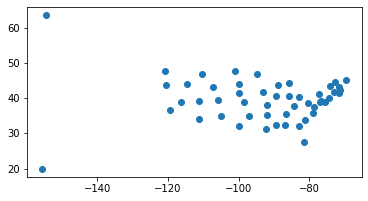

In [0]:
geo_gini.plot()

In [0]:
state_shape_path = '/content/drive/My Drive/Second Year (NYU)/Spring 2020 (2nd Year)/Computing for SUE/Final Project/Datasets/cb_2018_us_state_500k'
states = gpd.read_file(state_shape_path)

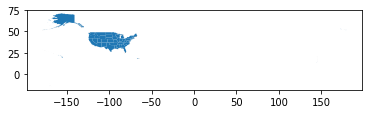

In [0]:
states.plot()

In [0]:
states.head(60)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [0]:
states.rename(columns = {'STUSPS':'state'})

,STATEFP,STATENS,AFFGEOID,GEOID,state,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


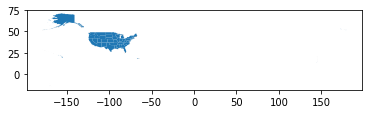

In [0]:
states.plot()

In [0]:
geo_gini.head()

,Idx,name,gini index,state,latitude,longitude,geometry
0,1,Utah,0.4063,UT,39.320980,-111.093731,POINT (-111.09373 39.32098)
1,2,Alaska,0.4081,AK,63.588753,-154.493062,POINT (-154.49306 63.58875)
2,3,New Hampshire,0.4304,NH,43.193852,-71.572395,POINT (-71.57240 43.19385)
3,4,Wyoming,0.4360,WY,43.075968,-107.290284,POINT (-107.29028 43.07597)
4,5,Hawaii,0.4420,HI,19.898682,-155.665857,POINT (-155.66586 19.89868)


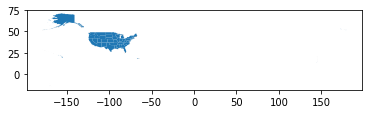

In [0]:
states.plot()

In [0]:
states = states.drop([13, 45, 44, 38, 37])
states.head(60)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


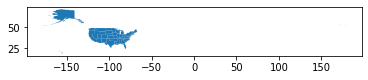

In [0]:
states.plot()

In [0]:
states = states.reset_index()

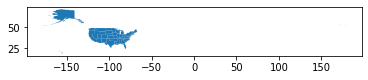

In [0]:
states.plot()

In [0]:
states.head(60)

,index,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [0]:
states = states.rename(columns = {'STUSPS':'state'})

In [0]:
states = states.merge(gini_idx, on='state')

In [0]:
states.head()

,index,STATEFP,STATENS,AFFGEOID,GEOID,state,NAME,LSAD,ALAND,AWATER,geometry,Idx,name,gini index
0,0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",44,Mississippi,0.4828
1,1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",35,North Carolina,0.4780
2,2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",23,Oklahoma,0.4645
3,3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",29,Virginia,0.4705
4,4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",30,West Virginia,0.4711


(-180.0, -66.0)

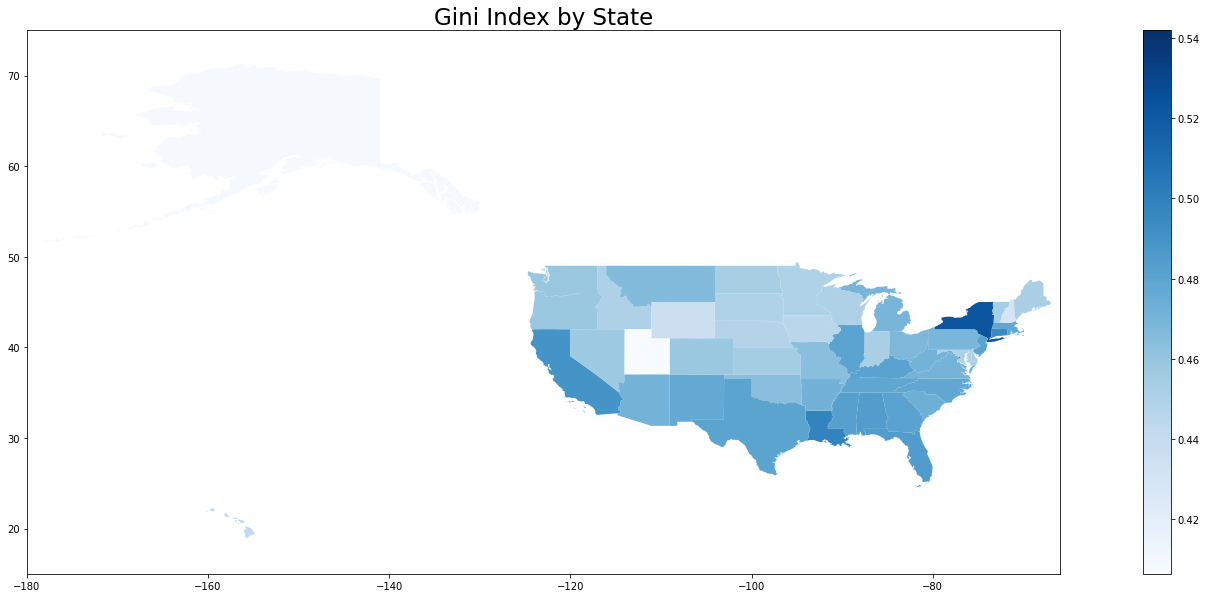

In [0]:
states.plot(column='gini index', legend = True, figsize=(30,10), cmap='Blues')
plt.title('Gini Index by State', fontsize = 23, color = 'black')
plt.ylim((15,75))
plt.xlim((-180,-66))

In [0]:
states.head(60)

,index,STATEFP,STATENS,AFFGEOID,GEOID,state,NAME,LSAD,ALAND,AWATER,geometry,Idx,name,gini index
0,0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",44,Mississippi,0.4828
1,1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",35,North Carolina,0.4780
2,2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",23,Oklahoma,0.4645
3,3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",29,Virginia,0.4705
4,4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",30,West Virginia,0.4711
5,5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",50,Louisiana,0.4990
6,6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",28,Michigan,0.4695
7,7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",37,Massachusetts,0.4786
8,8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",12,Idaho,0.4503
9,9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",46,Florida,0.4852


In [0]:
edu_path = '/content/drive/My Drive/Second Year (NYU)/Spring 2020 (2nd Year)/Computing for SUE/Final Project/Datasets/Education_by_county_2.csv'
edu = pd.read_csv(edu_path)
edu.head()

,FIPS Code,state,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
0,0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730","11,717,266",47.7,31.1,10.6,10.7,"44,535,197","45,947,035","20,794,975","21,558,480",33.5,34.6,15.7,16.2,"39,343,718","47,642,763","39,571,702","32,310,253",24.8,30.0,24.9,20.3,"35,715,625","52,168,981","49,864,428","44,462,605",19.6,28.6,27.4,24.4,"26,948,057","59,265,308","63,365,655","68,867,051",12.3,27.1,29.0,31.5
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287","141,936",58.7,25.9,7.5,7.8,"964,840","704,207","278,205","270,063",43.5,31.8,12.5,12.2,"843,638","749,591","553,512","399,228",33.1,29.4,21.7,15.7,"714,081","877,216","746,495","549,608",24.7,30.4,25.9,19.0,"470,043","1,020,172","987,148","822,595",14.2,30.9,29.9,24.9
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,767,54.8,31.1,7.7,6.4,"7,074","6,145","2,104","2,117",40.6,35.2,12.1,12.1,"6,252","6,671","4,912","3,026",30.0,32.0,23.5,14.5,"5,872","9,332","7,413","4,972",21.3,33.8,26.9,18.0,"4,204","12,119","10,552","10,291",11.3,32.6,28.4,27.7
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334","2,038",59.4,26.7,7.4,6.5,"18,125","15,380","6,602","5,498",39.7,33.7,14.5,12.1,"17,309","20,544","15,900","10,870",26.8,31.8,24.6,16.8,"17,258","28,428","28,178","22,146",18.0,29.6,29.3,23.1,"14,310","40,579","46,025","46,075",9.7,27.6,31.3,31.3
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,861,68.8,19.0,4.9,7.3,"7,759","3,671","1,362","1,300",55.1,26.1,9.7,9.2,"6,965","4,258","2,622","1,857",44.4,27.1,16.7,11.8,"6,679","6,124","4,025","2,068",35.3,32.4,21.3,10.9,"4,901","6,486","4,566","2,220",27.0,35.7,25.1,12.2


In [0]:
edu = edu.groupby(['state']).mean()

In [0]:
edu.head()

,FIPS Code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
state,,,,,,,,,,,,,,,,,,,,,,,,,
AK,2154.162162,7.259259,9.407407,7.586207,10.034483,49.026923,29.015385,11.069231,10.900000,27.908333,36.437500,18.716667,16.945833,21.615385,31.626923,29.050000,17.700000,16.892857,33.578571,30.760714,18.778571,9.710000,34.766667,32.266667,23.256667
AL,1066.014706,4.805970,4.477612,4.641791,4.388060,65.158824,23.060294,5.877941,5.894118,50.620588,30.066176,10.082353,9.247059,40.100000,30.242647,18.350000,11.308824,30.264706,32.794118,23.360294,13.570588,17.739706,35.769118,28.669118,17.813235
AR,5074.013158,5.640000,6.000000,5.640000,5.866667,65.972368,23.042105,5.948684,5.034211,50.073684,32.198684,9.403947,8.314474,38.868421,34.061842,17.157895,9.928947,28.978947,36.610526,22.051316,12.369737,16.151316,38.653947,28.911842,16.269737
AZ,4013.000000,3.866667,3.866667,3.800000,3.600000,49.293333,29.246667,11.513333,9.913333,34.780000,33.806667,18.000000,13.406667,29.568750,28.825000,27.556250,14.031250,24.250000,27.456250,31.712500,16.556250,15.775000,28.012500,35.618750,20.618750
CA,6057.016949,3.379310,3.327586,3.344828,3.362069,41.288136,32.898305,15.054237,10.750847,27.350847,33.994915,21.937288,16.723729,23.645763,25.876271,31.623729,18.852542,21.293220,23.733898,33.305085,21.657627,15.611864,23.471186,33.974576,26.938983


In [0]:
geo_edu = states.merge(edu, on='state')

In [0]:
geo_edu.head()

,index,STATEFP,STATENS,AFFGEOID,GEOID,state,NAME,LSAD,ALAND,AWATER,geometry,Idx,name,gini index,FIPS Code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
0,0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",44,Mississippi,0.4828,28081.012048,5.902439,6.414634,5.841463,6.097561,64.338554,21.719277,7.469880,6.472289,50.879518,27.890361,11.251807,9.978313,41.156627,28.142169,18.926506,11.774699,31.869880,30.812048,23.714458,13.590361,19.548193,33.138554,29.875904,17.436145
1,1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",35,North Carolina,0.4780,37099.009901,4.640000,4.750000,4.250000,4.070000,66.790099,20.096040,6.717822,6.404950,50.699010,27.380198,11.778218,10.148515,35.507921,30.720792,20.997030,12.769307,25.971287,31.785149,26.010891,16.238614,15.457426,30.608911,32.118812,21.818812
2,2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",23,Oklahoma,0.4645,40076.012821,5.584416,6.298701,5.623377,6.038961,56.048718,27.185897,9.423077,7.352564,41.079487,34.053846,13.403846,11.457692,31.055128,33.180769,22.542308,13.216667,23.167949,35.623077,25.706410,15.500000,14.058974,36.373077,30.158974,19.408974
3,3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",29,Virginia,0.4705,51266.073529,3.792593,3.666667,3.708955,3.380597,61.839098,21.833835,8.046617,8.282707,47.695588,27.197059,12.038971,13.068382,33.691912,29.692647,20.547059,16.069118,25.346324,30.879412,24.005147,19.767647,13.789552,31.120149,28.561940,26.535821
4,4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",30,West Virginia,0.4711,54054.017857,5.218182,5.581818,5.236364,5.309091,63.251786,25.228571,6.026786,5.503571,47.750000,34.923214,8.575000,8.746429,37.062500,37.842857,14.991071,10.094643,27.337500,41.485714,18.994643,12.183929,15.244643,44.112500,24.178571,16.460714


(-180.0, -66.0)

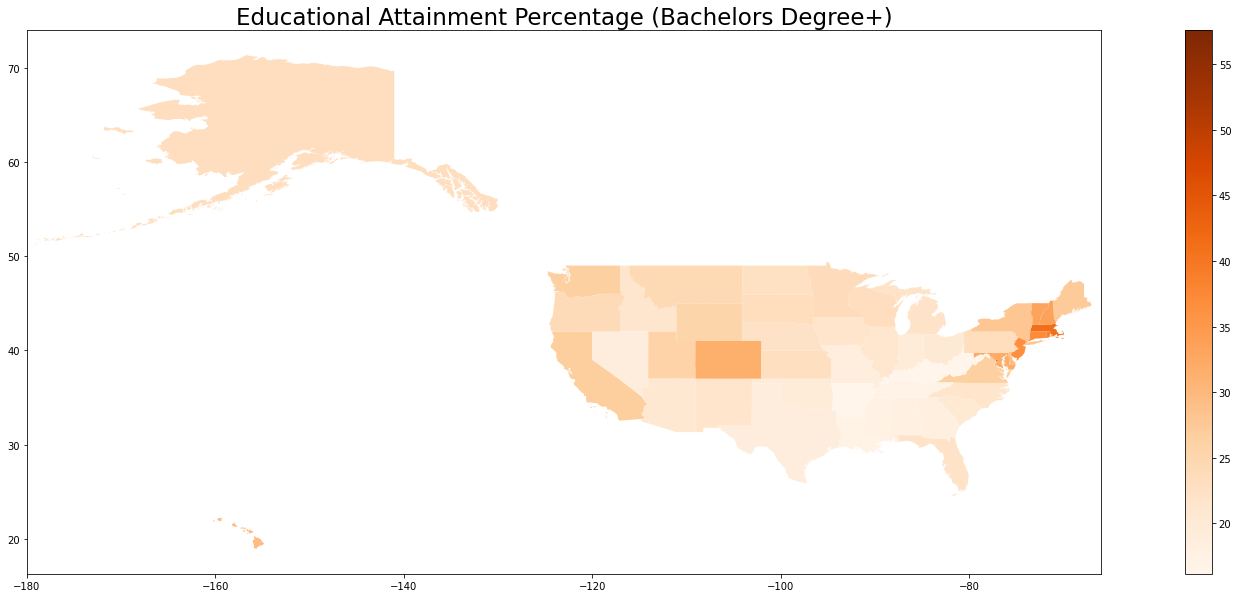

In [0]:
geo_edu.plot(column = "Percent of adults with a bachelor's degree or higher, 2014-18", legend = True, figsize= (30,10), cmap = 'Oranges')
plt.title('Educational Attainment Percentage (Bachelors Degree+)', fontsize = 23, color = 'black')
plt.xlim(-180,-66)

In [0]:
union_path = '/content/drive/My Drive/Second Year (NYU)/Spring 2020 (2nd Year)/Computing for SUE/Final Project/Datasets/union_membership.csv'
union = pd.read_csv(union_path)
union = union.sort_values(['state'])
union.head(60)

,state,State,Total Employed 2018,Total members 2018,Percent of employed 2018,total represented by unions 2018,Percent of employed represented by unions 2018,Total employed 2019,Total members 2018.1,Percent of employed 2019,total represented by unions 2019,Percent of employed represented by unions 2019
1,AK,Alaska,299,55,18.5,60,20.0,282,48,17.1,53,18.7
0,AL,Alabama,"1,950",180,9.2,196,10.1,"2,041",173,8.5,199,9.8
3,AR,Arkansas,"1,176",56,4.8,62,5.3,"1,200",62,5.2,71,5.9
2,AZ,Arizona,"2,943",156,5.3,191,6.5,"3,028",174,5.7,214,7.1
4,CA,California,"16,399","2,405",14.7,"2,587",15.8,"16,485","2,504",15.2,"2,726",16.5
5,CO,Colorado,"2,564",281,11.0,307,12.0,"2,631",237,9.0,259,9.8
6,CT,Connecticut,"1,677",268,16.0,280,16.7,"1,680",244,14.5,269,16.0
8,DC,District of Columbia,354,35,9.9,41,11.6,361,34,9.3,37,10.2
7,DE,Delaware,434,45,10.3,47,10.8,432,38,8.7,43,9.9
9,FL,Florida,"8,702",484,5.6,588,6.8,"8,827",551,6.2,667,7.6


In [0]:
geo_union = states.merge(union, on='state')
geo_union.head()

,index,STATEFP,STATENS,AFFGEOID,GEOID,state,NAME,LSAD,ALAND,AWATER,geometry,Idx,name,gini index,State,Total Employed 2018,Total members 2018,Percent of employed 2018,total represented by unions 2018,Percent of employed represented by unions 2018,Total employed 2019,Total members 2018.1,Percent of employed 2019,total represented by unions 2019,Percent of employed represented by unions 2019
0,0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",44,Mississippi,0.4828,Mississippi,"1,121",58,5.1,80,7.1,"1,105",70,6.3,93,8.4
1,1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",35,North Carolina,0.4780,North Carolina,"4,331",118,2.7,174,4.0,"4,396",102,2.3,150,3.4
2,2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",23,Oklahoma,0.4645,Oklahoma,"1,583",90,5.7,117,7.4,"1,554",96,6.2,123,7.9
3,3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",29,Virginia,0.4705,Virginia,"3,875",168,4.3,213,5.5,"3,881",156,4.0,201,5.2
4,4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",30,West Virginia,0.4711,West Virginia,684,68,10.0,74,10.8,704,72,10.2,78,11.1


(-180.0, -66.0)

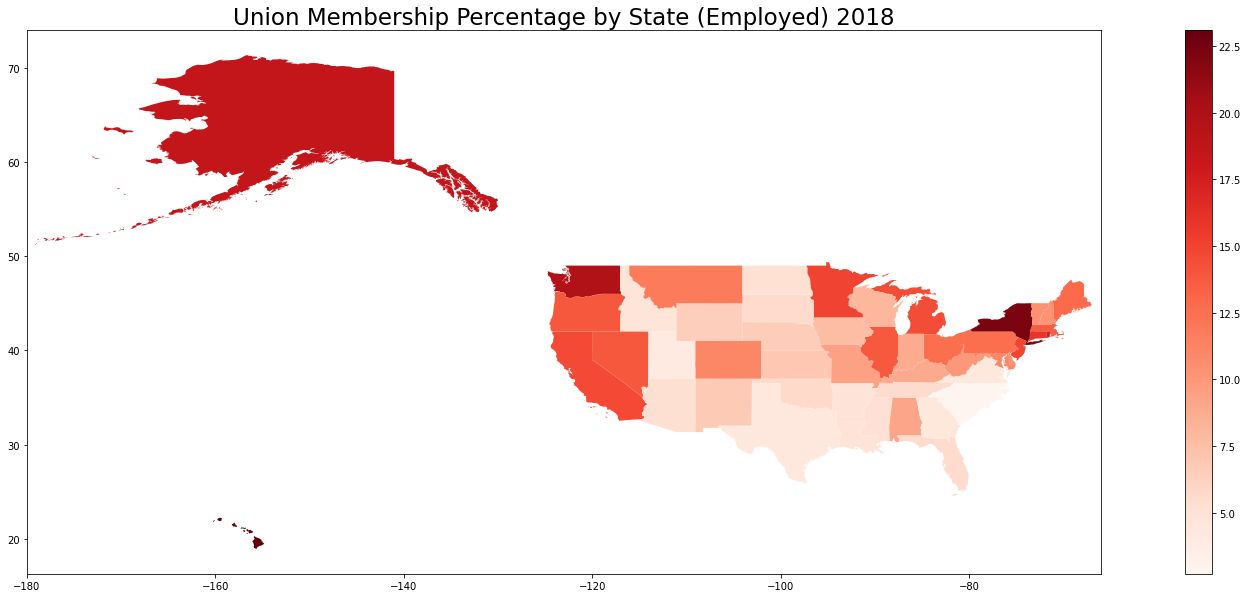

In [0]:
geo_union.plot(column='Percent of employed 2018',legend=True, figsize=(30,10), cmap='Reds')
plt.title("Union Membership Percentage by State (Employed) 2018", fontsize=23, color='black')
plt.xlim(-180,-66)

(-180.0, -66.0)

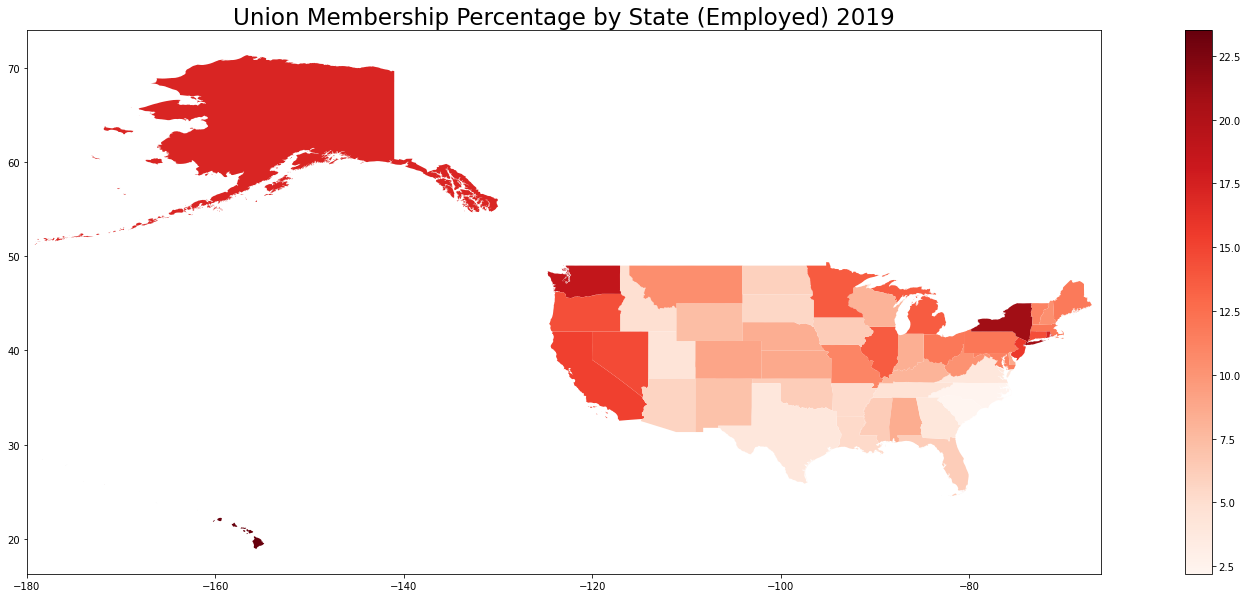

In [0]:
geo_union.plot(column='Percent of employed 2019',legend=True, figsize=(30,10), cmap='Reds')
plt.title("Union Membership Percentage by State (Employed) 2019", fontsize=23, color='black')
plt.xlim(-180,-66)

In [0]:
home_path = '/content/drive/My Drive/Second Year (NYU)/Spring 2020 (2nd Year)/Computing for SUE/Final Project/Datasets/Copy of Home.csv'
home = pd.read_csv(home_path)
home = home.rename(columns={'State':'state'})
home.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,state,Metro,StateCodeFIPS,MunicipalCodeFIPS,Average Value March 2019-2020,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,640573.4615,631517,630167,630698,632055,632683,634150,636295,639331,641908,646084,650608,657464,664495
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,247247.8462,246887,247265,247481,247549,247860,247905,247709,247416,247110,246836,246704,246694,246806
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,198844.0000,196909,196658,196648,197084,197701,198241,198605,199206,199748,200350,200569,201110,202143
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,289799.0769,280906,281591,282451,283650,285115,286994,288669,290583,292654,295076,297501,299765,302433
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,608644.1538,595100,597765,599583,601312,603078,604617,606428,607862,610758,614348,619380,623624,628519


In [0]:
geo_home = states.merge(home, on='state')

(-180.0, -66.0)

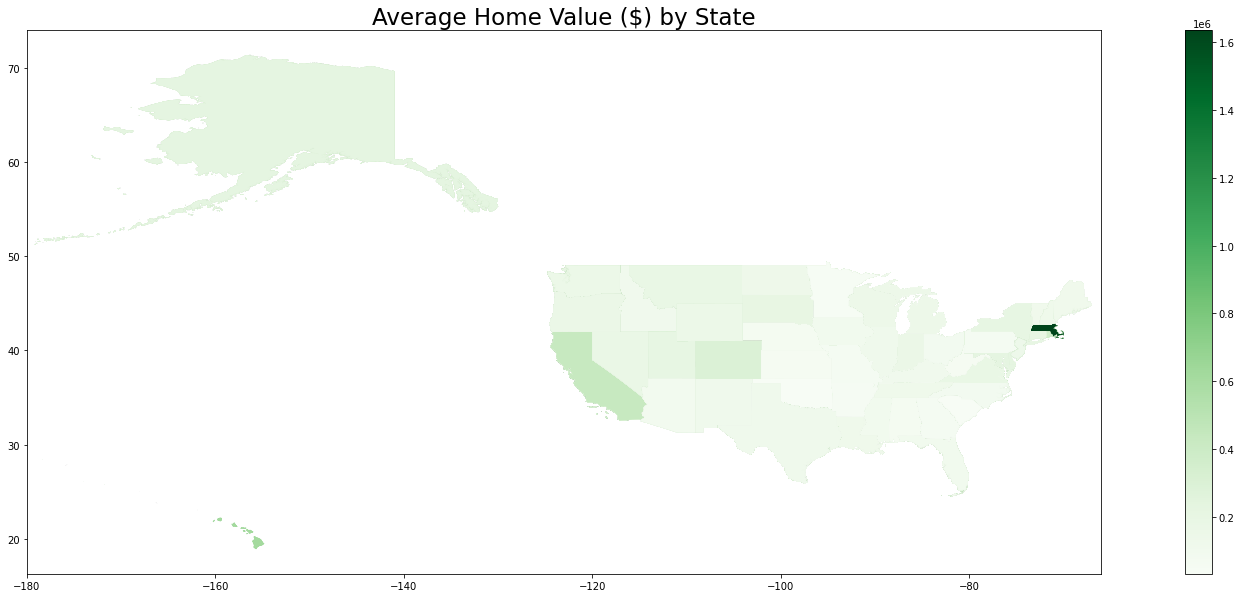

In [0]:
geo_home.plot(column = '3/31/2020', legend = True, figsize = (30,10), cmap = 'Greens')
plt.title('Average Home Value ($) by State', fontsize =23, color='black')
plt.xlim(-180,-66)


In [0]:
crime_path = '/content/drive/My Drive/Second Year (NYU)/Spring 2020 (2nd Year)/Computing for SUE/Final Project/Datasets/Crime_by_state.csv'
crime = pd.read_csv(crime_path)
crime = crime.rename(columns = {'State':'state'})
crime.head()

,state,States,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate
0,AL,Alabama,4849377,20727,276,1436,2005,4701,13745,154094,39715,104238,10141,427.4,5.7,29.6,41.3,96.9,283.4,3177.6,819.0,2149.5,209.1
1,AK,Alaska,736732,4684,41,555,771,629,3243,20334,3150,15445,1739,635.8,5.6,75.3,104.7,85.4,440.2,2760.0,427.6,2096.4,236.0
2,AZ,Arizona,6731484,26916,319,2464,3378,6249,16970,215240,43562,154091,17587,399.9,4.7,36.6,50.2,92.8,252.1,3197.5,647.1,2289.1,261.3
3,AR,Arkansas,2966369,14243,165,1182,1763,2050,10265,99018,24790,68627,5601,480.1,5.6,39.8,59.4,69.1,346.0,3338.0,835.7,2313.5,188.8
4,CA,California,38802500,153709,1699,8398,11527,48680,91803,947192,202670,592670,151852,396.1,4.4,21.6,29.7,125.5,236.6,2441.1,522.3,1527.4,391.3


In [0]:
geo_crime = states.merge(crime, on='state')
geo_crime.head()

,index,STATEFP,STATENS,AFFGEOID,GEOID,state,NAME,LSAD,ALAND,AWATER,geometry,Idx,name,gini index,States,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate
0,0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",44,Mississippi,0.4828,Mississippi,2994079,8338,258,764,1058,2430,4592,87462,24352,58591,4519,278.5,8.6,25.5,35.3,81.2,153.4,2921.2,813.3,1956.9,150.9
1,1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",35,North Carolina,0.4780,North Carolina,9943964,32767,510,1740,2420,8416,21421,285697,79373,192694,13630,329.5,5.1,17.5,24.3,84.6,215.4,2873.1,798.2,1937.8,137.1
2,2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",23,Oklahoma,0.4645,Oklahoma,3878051,15744,175,1277,1777,3048,10744,115982,29508,75891,10583,406.0,4.5,32.9,45.8,78.6,277.0,2990.7,760.9,1956.9,272.9
3,3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",29,Virginia,0.4705,Virginia,8326289,16340,338,1432,2310,4292,9400,160720,23122,129933,7665,196.2,4.1,17.2,27.7,51.5,112.9,1930.3,277.7,1560.5,92.1
4,4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",30,West Virginia,0.4711,West Virginia,1850326,5588,74,285,505,651,4358,37648,8973,26779,1896,302.0,4.0,15.4,27.3,35.2,235.5,2034.7,484.9,1447.3,102.5


(-180.0, -66.0)

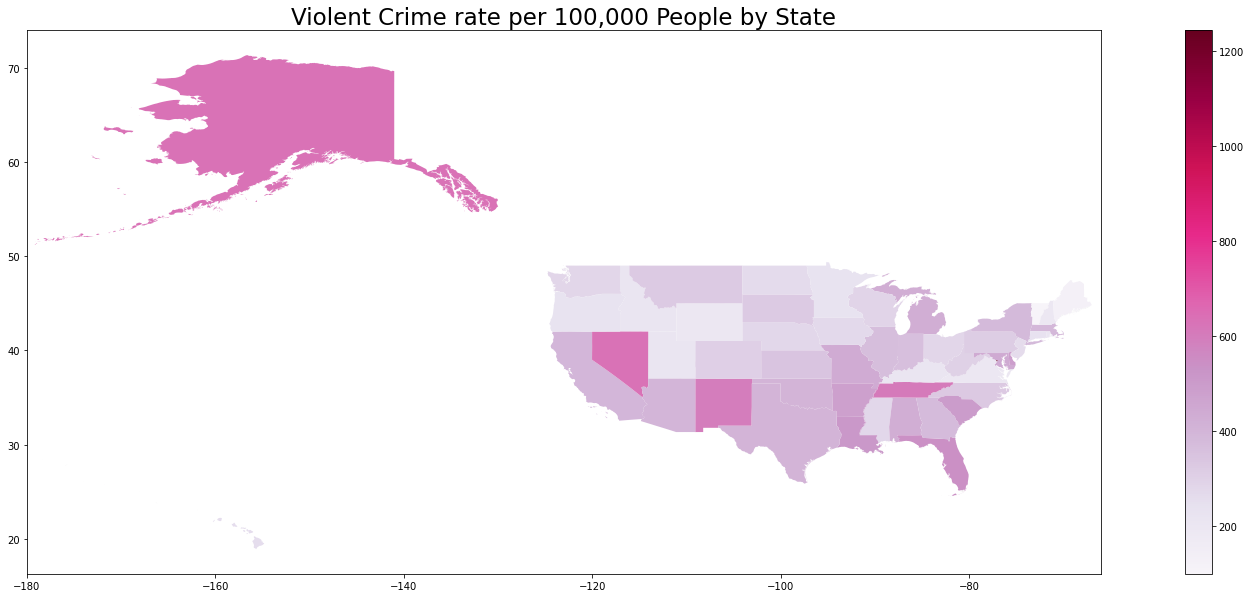

In [0]:
geo_crime.plot(column = 'Violent Crime rate', legend = True, figsize=(30,10), cmap = 'PuRd')
plt.title('Violent Crime rate per 100,000 People by State', fontsize=23, color='black')
plt.xlim(-180,-66)